In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\91903\\Desktop\\Projects\\DataSets'

In [3]:
trans = pd.read_csv("Top250transfers.csv")
trans.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Kylian Mbappé,Right Winger,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018,120000000.0,135000000
1,Cristiano Ronaldo,Centre-Forward,33,Real Madrid,LaLiga,Juventus,Serie A,2018,100000000.0,117000000
2,Neymar,Left Winger,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017,100000000.0,222000000
3,Riyad Mahrez,Right Winger,27,Leicester,Premier League,Man City,Premier League,2018,50000000.0,67800000
4,Alisson,Goalkeeper,25,AS Roma,Serie A,Liverpool,Premier League,2018,60000000.0,62500000


In [4]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 10 columns):
Name            4700 non-null object
Position        4700 non-null object
Age             4700 non-null int64
Team_from       4700 non-null object
League_from     4700 non-null object
Team_to         4700 non-null object
League_to       4700 non-null object
Season          4700 non-null int64
Market_value    3440 non-null float64
Transfer_fee    4700 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 257.1+ KB


# Changing Transfer fee and Market values interms of millions

In [5]:
Transfer_fee = pd.DataFrame(trans["Transfer_fee"])
Transfer_fee = (Transfer_fee / 1000000)
trans["Transfer_fee"] = Transfer_fee

Market_value = pd.DataFrame(trans["Market_value"])
Market_value = (Market_value / 1000000)
trans["Market_value"] = Market_value


# Dropping Forward ; Sweeper ; Midfielder and Defender positions

In [6]:
trans = trans.loc[~((trans['Position'] == 'Sweeper') | (trans['Position'] == 'Forward') | (trans['Position'] == 'Defender') | (trans['Position'] == 'Midfielder'))]
trans["Position"].value_counts()

Centre-Forward        1218
Centre-Back            714
Central Midfield       487
Attacking Midfield     426
Defensive Midfield     411
Right Winger           305
Left Winger            267
Left-Back              225
Right-Back             181
Goalkeeper             180
Second Striker         130
Left Midfield           87
Right Midfield          63
Name: Position, dtype: int64

# Reducing the length of Position names

In [7]:
trans["Position"] = trans["Position"].replace({'Centre-Forward': 'CF', 'Centre-Back': 'CB', 'Central Midfield': 'CM', 'Attacking Midfield': 'AM', 'Defensive Midfield': 'DM', 'Right Winger': 'RW','Left Winger': 'LW', 'Left-Back': 'LB', "Right-Back": 'RB', 'Goalkeeper': 'GK', 'Second Striker': 'SST', 'Left Midfield': 'LM', 'Right Midfield': 'RM', 'Forward': 'FW'})


# Plot Displaying the Positions with the most number of transfers

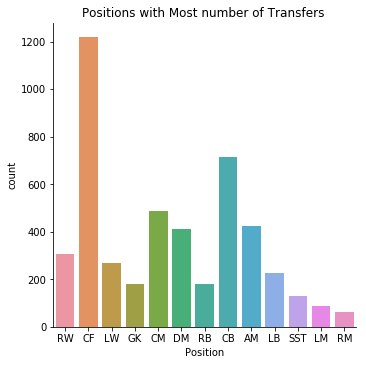

In [9]:
a1 = sns.catplot(x="Position",data=trans,kind = "count")
a1.set(title = "Positions with Most number of Transfers ")

In the above plot, we can see that players who are playing as Centre-Forwards had the maximum number of transfers with a count of 1218, followed by Centre-backs and Center-Midfield with 714 and 487 respectively.

# Positions with the Highest Transfer Fees

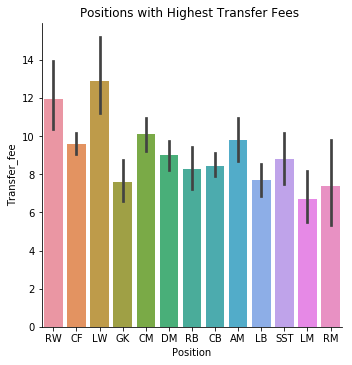

In [10]:
a2 = sns.catplot(y="Transfer_fee",x="Position",data=trans,kind = "bar")
a2.set(title = "Positions with Highest Transfer Fees ")

Even though Centre-Forwards had the most number of Transfers, Left-Wingers had the highest transfers of all the positions.
This is majorly influnced by transfer of Neymar Initially from Santos FC to FC Barcelona and later from FC Barcelona to PSG.

In [11]:
season_cost = trans.loc[:,["Season","Transfer_fee"]]
season_cost = season_cost.groupby(['Season']).sum()
season_cost = season_cost.rename_axis('Season').reset_index()

# Trend of Transfer Fees over the period between 2000-2018

[Text(0.5, 1.0, 'Change of Transfer Fee over Multiple Seasons')]

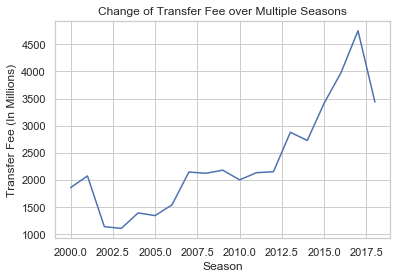

In [12]:
sns.set(style="whitegrid")
a3 = sns.lineplot(x="Season",y="Transfer_fee",data=season_cost)
a3.set(xlabel = "Season", ylabel = "Transfer Fee (In Millions)")
a3.set(title = "Change of Transfer Fee over Multiple Seasons")

Highest transfer fees were observed in the 2017-2018 Season with a total spending of 4748.180 Millions.
Sharp increase observed from 2014-15 & 2015-16 season

In [13]:
#Obtaining top and bottom 10 players based on transfer fee
top10 = trans.sort_values(by=['Transfer_fee'], ascending = False)[0:10]
bottom10 = trans.sort_values(by=['Transfer_fee'])[0:10]
top10

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
2,Neymar,LW,25,FC Barcelona,LaLiga,Paris SG,Ligue 1,2017,100.0,222.0
0,Kylian Mbappé,RW,19,Monaco,Ligue 1,Paris SG,Ligue 1,2018,120.0,135.0
246,Philippe Coutinho,AM,25,Liverpool,Premier League,FC Barcelona,LaLiga,2017,90.0,125.0
1,Cristiano Ronaldo,CF,33,Real Madrid,LaLiga,Juventus,Serie A,2018,100.0,117.0
247,Ousmane Dembélé,RW,20,Bor. Dortmund,1.Bundesliga,FC Barcelona,LaLiga,2017,33.0,115.0
489,Paul Pogba,CM,23,Juventus,Serie A,Man Utd,Premier League,2016,70.0,105.0
1233,Gareth Bale,RW,24,Spurs,Premier League,Real Madrid,LaLiga,2013,65.0,101.0
2225,Cristiano Ronaldo,CF,24,Man Utd,Premier League,Real Madrid,LaLiga,2009,60.0,94.0
490,Gonzalo Higuaín,CF,28,SSC Napoli,Serie A,Juventus,Serie A,2016,65.0,90.0
9,Neymar,LW,21,Santos FC,Série A,FC Barcelona,LaLiga,2013,50.0,88.2


# Positions and Transfer Fees for Top 10 Players

[Text(0.5, 1.0, 'Position Vs Transfer Fees for Top 10 Players')]

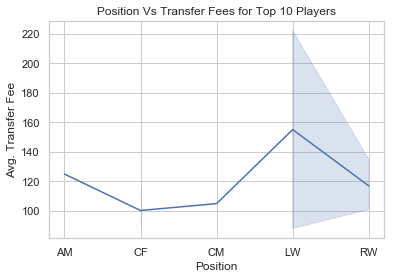

In [14]:
a4=sns.lineplot(x="Position", y="Transfer_fee", data=top10)
a4.set(xlabel = "Position" , ylabel = "Avg. Transfer Fee" )
a4.set(title = "Position Vs Transfer Fees for Top 10 Players")

The Left Wing position has the highest average transfer fee. Again, the reason for this is the transfer(s) of Neymar.
Apart from Neymar, Cristiano Ronaldo is the only other player who has appeared twice in the above Top10 list.


# Positions and Transfer Fees for Bottom 10 Players

[Text(0.5, 1.0, 'Position Vs Transfer Fees for Bottom 10 Players')]

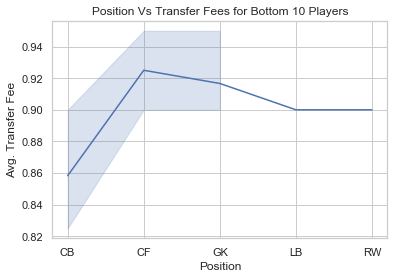

In [15]:
a5= sns.lineplot(x="Position", y="Transfer_fee", data=bottom10)
a5.set(xlabel = "Position" , ylabel = "Avg. Transfer Fee" )
a5.set(title = "Position Vs Transfer Fees for Bottom 10 Players")

The bottom10 players all had a transfer fee of less than one million. 


In [16]:
#Getting top 10 teams and Leagues where players have transferred to

league_to = trans.loc[:,['League_to']]
league_to = pd.DataFrame(league_to)
league_to = league_to['League_to'].value_counts()[0:10]
league_to = pd.DataFrame(league_to)
league_to.index.name = "League"
league_to = league_to.rename_axis('League').reset_index()
league_to.columns = ['League','Count']
league_to

team_to = trans.loc[:,['Team_to']]
team_to = pd.DataFrame(team_to)
team_to = team_to['Team_to'].value_counts()[0:10]
team_to = pd.DataFrame(team_to)
team_to.index.name = "Team"
team_to = team_to.rename_axis('team').reset_index()
team_to.columns = ['Team','Count']
team_to

,Team,Count
0,Inter,97
1,Chelsea,96
2,Man City,94
3,Spurs,93
4,Juventus,87
5,Liverpool,85
6,AS Roma,77
7,Real Madrid,75
8,FC Barcelona,70
9,Atlético Madrid,69


In [17]:
#Getting top 10 teams and Leagues where players have transferred to

league_from = trans.loc[:,['League_from']]
league_from = pd.DataFrame(league_from)
league_from = league_from['League_from'].value_counts()[0:10]
league_from = pd.DataFrame(league_from)
league_from.index.name = "Team"
league_from = league_from.rename_axis('team').reset_index()
league_from.columns = ['League','Count']
league_from

team_from = trans.loc[:,['Team_from']]
team_from = pd.DataFrame(team_from)
team_from = team_from['Team_from'].value_counts()[0:10]
team_from = pd.DataFrame(team_from)
team_from.index.name = "Team"
team_from = team_from.rename_axis('team').reset_index()
team_from.columns = ['Team','Count']
team_from

,Team,Count
0,Inter,68
1,Spurs,63
2,Juventus,59
3,Chelsea,57
4,Liverpool,56
5,FC Porto,56
6,Real Madrid,53
7,Benfica,52
8,Atlético Madrid,52
9,Udinese Calcio,51


# Plot displaying leagues to which majority players have transferred to

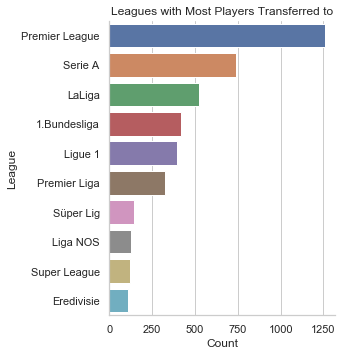

In [18]:
a6 = sns.catplot(y="League",x="Count",data=league_to,kind = "bar")
a6.set(Title = "Leagues with Most Players Transferred to")

# Plot displaying leagues to which majority players have transferred from

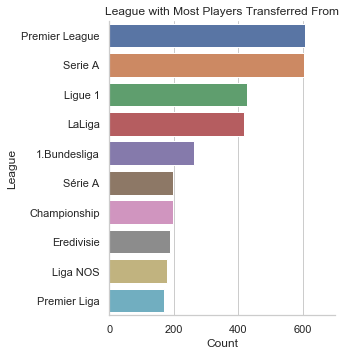

In [19]:
a7 = sns.catplot(y="League",x="Count",data=league_from,kind = "bar")
a7.set(xlim = (0,700))
a7.set(Title = "League with Most Players Transferred From")

The two leagues which has seen the majority of Transfer activities are Premier League and Serie A.

# Teams who have brought in most number of players

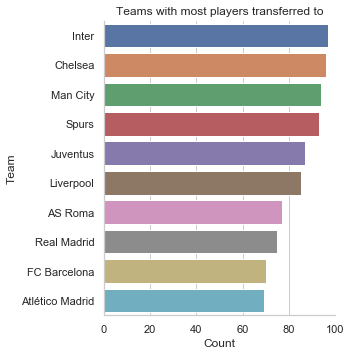

In [20]:
a8 = sns.catplot(y="Team",x="Count",data=team_to,kind = "bar")
a8.set(xlim = (0,100))
a8.set(Title = "Teams with most players transferred to")

# Plot showing the teams where the majority of players have left

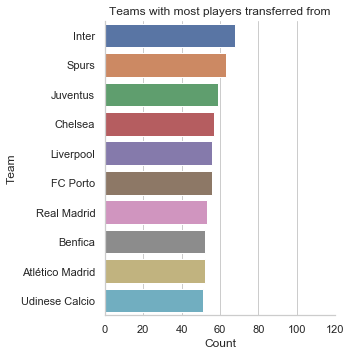

In [21]:
a9 = sns.catplot(y="Team",x="Count",data=team_from,kind = "bar")
a9.set(xlim = (0,120))
a9.set(Title = "Teams with most players transferred from")